In [13]:
import pymysql as mysql
from sshtunnel import SSHTunnelForwarder
import matplotlib.pyplot as plt
import pandas as pd
import json

creds = json.load(open('cred_db.json', 'r'))

In [5]:
ssh_host = creds['SSH_HOST']
ssh_port = 22
ssh_user = creds['SSH_USER']
ssh_pass = creds['SSH_PASS']

db_port = creds['DB_PORT']
db_ip = 'localhost'
db_user = creds['DB_USER']
db_pass = creds['DB_PASS']
db_name = creds['DB_NAME']

# Creando tunnel
Esto solo es necesario para la conección con el servidor de DataFae por el modo en que se administra la conecion

In [6]:
ssh_tunnel =  SSHTunnelForwarder(
                (ssh_host,ssh_port),
                ssh_username=ssh_user,
                ssh_password=ssh_pass,
                allow_agent=False,
                remote_bind_address=(db_ip, db_port))

ssh_tunnel.start()


# Conectando con la Base de Datos

In [7]:
try:
       conn = mysql.connect(
              host='localhost',
              port=ssh_tunnel.local_bind_port,
              user=db_user,
              password=db_pass,
              database=db_name)
       cur = conn.cursor()    
except Exception as e:
       print(e)
       

# Simple

In [8]:
query="SELECT NOMBRE, RUT FROM CLIENTES"
cur.execute(query)
response = cur.fetchall()

personas = []
for row in response:
    persona = {
        "name":row[0],
        "rut":row[1]
    }
    personas.append(persona)

personas

[{'name': 'Ariam Aranda Reyes', 'rut': None},
 {'name': 'Amaru Fernandez Durán', 'rut': None},
 {'name': 'Diana López Áviles', 'rut': None},
 {'name': 'Constanza Tobar Riquelme', 'rut': None},
 {'name': 'Claudia Cordero Solis', 'rut': None},
 {'name': 'Victoria Aravena Opazo', 'rut': None},
 {'name': 'Sally Aranda Reyes', 'rut': None},
 {'name': 'Cecilia Reyes Vargas', 'rut': None},
 {'name': 'Ada Wynn Lunt', 'rut': None},
 {'name': 'Alicia Aranda Reyes', 'rut': None},
 {'name': 'Hilda Vicencio Serey', 'rut': None},
 {'name': 'Camila Carrasco Latin', 'rut': None},
 {'name': 'Camila Carrasco Latin', 'rut': None},
 {'name': 'Camila Carrasco Latin', 'rut': None},
 {'name': 'Camila Carrasco Latin', 'rut': None},
 {'name': 'Camila Carrasco Latin', 'rut': None},
 {'name': 'Camila Carrasco Latin', 'rut': None},
 {'name': 'RODRIGO LEFIN', 'rut': None},
 {'name': 'Camila Carrasco Latin', 'rut': None},
 {'name': 'CAMILA CARRASCO', 'rut': None},
 {'name': 'Juan Vicenzio', 'rut': '17984785-2'},
 {

In [24]:
query="""
SELECT MAX(PRECIO) PRECIO_MAX, MIN(PRECIO) PRECIO_MIN, COUNT(*) CONTEO,
       AVG(PRECIO) PROMEDIO
FROM PRODUCTOS
WHERE TIPO_PRODUCTO_ID in (1,2,3,4)
"""
cur.execute(query)
response = cur.fetchall()

response


((5000, 1990, 6, Decimal('4096.6667')),)

# Con Pandas

In [10]:
query="""
SELECT MAX(PRECIO) PRECIO_MAX, MIN(PRECIO) PRECIO_MIN, COUNT(*) CONTEO,
       AVG(PRECIO) PROMEDIO
FROM PRODUCTOS
"""
response = pd.read_sql_query(query,conn)
response

,PRECIO_MAX,PRECIO_MIN,CONTEO,PROMEDIO
0,1500000,1990,12,199796.6667


In [25]:
query="""
SELECT PRECIO
FROM PRODUCTOS
"""
response = pd.read_sql_query(query,conn)
response

,PRECIO
0,5000
1,4000
2,600000
3,1500000
4,13990
5,5000
6,4590
7,4000
8,30000
9,220000


<Axes: ylabel='Frequency'>

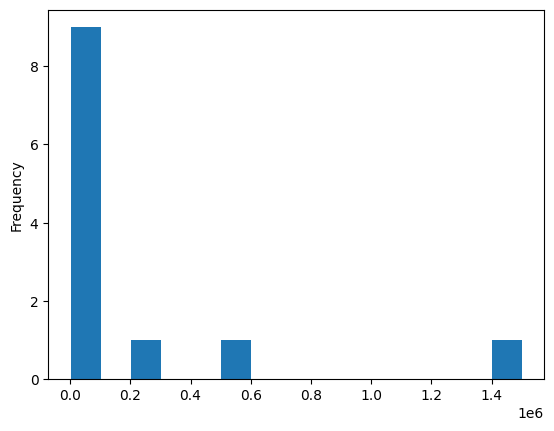

In [30]:
response['PRECIO'].plot.hist(bins=15)

# Cerrando conecciones

In [7]:
conn.close()
ssh_tunnel.close

<bound method SSHTunnelForwarder.close of <class 'sshtunnel.SSHTunnelForwarder'> object
ssh gateway: 146.83.189.110:22
proxy: no
username: laboratorio
authentication: {'password': 'datafae2022'}
hostkey: not checked
status: started
keepalive messages: every 5.0 sec
tunnel connection check: disabled
concurrent connections: allowed
compression: not requested
logging level: ERROR
local binds: [('0.0.0.0', 0)]
remote binds: [('localhost', 33060)]>